# Accessing Spatial Data in Census

## Introduction: Accessing Spatial Data via CELLxGENE Census API

We are excited to announce that spatial data is now accessible in **Census**. Users can query and retrieve spatial datasets from the CELLxGENE spatial corpus. Currently, the following spatial assays are supported:
- **Visium**
- **Slide-seq V2**

This functionality is available starting from:
- **CELLxGENE Census**: Version `v1.16.2`
- **TileDB-SOMA**: Version `v1.15.5`

### Key Features

1. **Query Spatial Data**: Use the Census spatial object to perform queries and retrieve spatial slides from the CELLxGENE spatial corpus. Filter based on categorical metadata and gene expression.
2. **Export to SpatialData**: Retrieved spatial data can be exported to the SpatialData library for further analysis and visualization.

We will now demonstrate how to query the spatial census object, export to [SpatialData](https://spatialdata.scverse.org/en/stable/) plot spatial data retrieved from Census.


## Environment and dependencies

We recommend that you set up a new environment to avoid conflicts with any existing packages you may have in your regular or system python environment. Here is an example using [conda](https://anaconda.org/anaconda/conda):

```
conda create --name spatial-census-dev python=3.11 -y # create virtual env
conda activate spatial-census-dev
conda install -c conda-forge jupyterlab # or "pip install jupyterlab" if not using conda
```


### Install

To get started, ensure you have the necessary dependencies installed (we recommend doing this in a virtual environment). You’ll need TileDB-SOMA (v1.15.3 or later) and SpatialData (including the extras for spatial support). You can install them using the following commands:

In [ ]:
!pip install cellxgene-census tiledbsoma "spatialdata[extra]>=0.2.5"

### Load

In [2]:
import cellxgene_census
import tiledbsoma
import os
import spatialdata as sd
import spatialdata_plot

import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/envs/spatial-census-dev/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [3]:
#versions of required libraries for this tutorial
print("cellxgene_census",cellxgene_census.__version__)
print("tiledbsoma", tiledbsoma.__version__)
print("spatialdata", sd.__version__)
print("spatialdata plot", spatialdata_plot.__version__)

cellxgene_census 1.16.2
tiledbsoma 1.15.5
spatialdata 0.3.0
spatialdata plot 0.2.9


## Census Metadata

We can find Census level metadata in the `census_info` slot. In this slot we can also view a complete list of datasets in this release of the census - note the inclusion of spatial datasets in the sample data table printed below. Additionally, we can print out the keys associated with the `census_spatial_sequencing` slot giving us access to Visium and Slide seq V2 assays performed in either mouse or human. Also note that for spatial data within census, we make no normalized expression data layer available.

In [27]:
with cellxgene_census.open_soma(census_version="latest") as census:
    #Print Census level metadata
    print("Census level metadata\n")
    print(list(census["census_info"].keys()))

    print("\n")
    
    print("Census datasets info\n")
    print(census["census_info"]["datasets"].read().concat().to_pandas().head())

    print("\n")
    
    print("Census spatial keys\n")
    print(list(census["census_spatial_sequencing"].keys()))

    #[optional] not run - spatial data obs metadata table
    #print(census["census_spatial_sequencing"]["homo_sapiens"]["obs"].read().concat().to_pandas().head())

    #[optional] not run - spatial data var metadata table
    #print(census["census_spatial_sequencing"]["homo_sapiens"]["ms"]["RNA"]["var"].read().concat().to_pandas().head())
    

Census level metadata

['datasets', 'organisms', 'summary', 'summary_cell_counts']


Census datasets info

   soma_joinid                                           citation  \
0            0  Publication: https://doi.org/10.1016/j.isci.20...   
1            1  Publication: https://doi.org/10.1016/j.isci.20...   
2            2  Publication: https://doi.org/10.1016/j.isci.20...   
3            3  Publication: https://doi.org/10.1016/j.isci.20...   
4            4  Publication: https://doi.org/10.1038/s41591-02...   

                          collection_id  \
0  8e880741-bf9a-4c8e-9227-934204631d2a   
1  8e880741-bf9a-4c8e-9227-934204631d2a   
2  8e880741-bf9a-4c8e-9227-934204631d2a   
3  8e880741-bf9a-4c8e-9227-934204631d2a   
4  a96133de-e951-4e2d-ace6-59db8b3bfb1d   

                                     collection_name  \
0  High Resolution Slide-seqV2 Spatial Transcript...   
1  High Resolution Slide-seqV2 Spatial Transcript...   
2  High Resolution Slide-seqV2 Spatial Transcript..

Census Spatial datasets are located in a SOMA object that is distinct from Cenus single cell data. We can see the top level organization of Census with the included Census Spatial object.

## Query the Census Spatial Sequencing object 

This example demonstrates how to query spatial single-cell data from the CELLxGENE Census. We extract metadata for human cells that match specific criteria, such as sex and cell type. Here's what the code does:

- **Open the Census**: Access the dataset for the latest build, dated *2025-01-21*.
- **Filter the Data**: Select cells labeled as "female" and of types "microglial cell" or "neuron."
- **Retrieve Metadata**: Specify which metadata columns to include in the results.
- **Process the Output**: Convert the filtered data into a pandas DataFrame for further analysis.

The resulting DataFrame contains the metadata for the filtered subset, ready for exploration or downstream use.

In [6]:
## perform queries
with cellxgene_census.open_soma(census_version="latest") as census:

    # Reads SOMADataFrame as a slice
    cell_metadata = census["census_spatial_sequencing"]["homo_sapiens"].obs.read(
        value_filter = "sex == 'female' and cell_type in ['microglial cell', 'neuron']",
        column_names = ["assay", "cell_type", "tissue", "tissue_general", "suspension_type", "disease"]
    )

    # Concatenates results to pyarrow.Table
    cell_metadata = cell_metadata.concat()

    # Converts to pandas.DataFrame
    cell_metadata = cell_metadata.to_pandas()

    print(cell_metadata)

                             assay cell_type tissue tissue_general  \
0                      Slide-seqV2    neuron  liver          liver   
1                      Slide-seqV2    neuron  liver          liver   
2                      Slide-seqV2    neuron  liver          liver   
3                      Slide-seqV2    neuron  liver          liver   
4                      Slide-seqV2    neuron  liver          liver   
..                             ...       ...    ...            ...   
72                     Slide-seqV2    neuron  liver          liver   
73                     Slide-seqV2    neuron  liver          liver   
74  Visium Spatial Gene Expression    neuron   lung           lung   
75  Visium Spatial Gene Expression    neuron   lung           lung   
76  Visium Spatial Gene Expression    neuron   lung           lung   

   suspension_type        disease     sex  
0               na  breast cancer  female  
1               na  breast cancer  female  
2               na  breast 

## Spatial Data Export

We can export our data to the `spatialdata` format (see documentation [here](https://spatialdata.scverse.org/en/stable/) for more information), enabling us to visualize and analyze it. In the next block, we query the human experiment in the census. With `axis_query`, we can set a filter using the `obs_query` argument, where we can specify which spatial slide(s) to return. Note that we demonstrates an alternative to filtering based on categorical metadata, as shown earlier. This approach will return only a single slide corresponding to the dataset we have identified. You can find After the query has been formed, we can use the `to_spatialdata` method to export our filtered data to the `spatial data` format.

In [7]:
## export to spatialdata

census = cellxgene_census.open_soma(census_version="latest") # similar to the query above, but without the context manager

exp = census["census_spatial_sequencing"]["homo_sapiens"]

#alternative way to perform query with tiledbsoma instead of cellxgene_census
with exp.axis_query(
    measurement_name="RNA",
    obs_query=tiledbsoma.AxisQuery(value_filter="dataset_id == '4cceac62-9513-42a4-90e5-2878dbb0192c'") # query specific dataset instead of by obs metadata
) as query:
    sdata = query.to_spatialdata(X_name="raw")

In the cells below, we explore the structure of the resultinig SpatialData object. You can find a more detailed description of the SpatialData definition [here](https://spatialdata.scverse.org/en/stable/api/SpatialData.html). Note that in our current example we have only exported a single dataset, however in the scenario where multiple datasets (slides) match your query - all of those slides will be stored as different "scenes" within the SpatialData object. The corresponding assets for each scene will be distinguished by the prepended UUID (i.e. in this example, `4cceac62-9513-42a4-90e5-2878dbb0192c`, refers to the dataset UUID).

In [8]:
sdata

SpatialData object
├── Images
│     └── '4cceac62-9513-42a4-90e5-2878dbb0192c_library': DataArray[cyx] (3, 1862, 2000)
├── Shapes
│     └── '4cceac62-9513-42a4-90e5-2878dbb0192c_loc': GeoDataFrame shape: (4992, 3) (2D shapes)
└── Tables
      └── 'RNA': AnnData (4992, 44405)
with coordinate systems:
    ▸ '4cceac62-9513-42a4-90e5-2878dbb0192c', with elements:
        4cceac62-9513-42a4-90e5-2878dbb0192c_library (Images), 4cceac62-9513-42a4-90e5-2878dbb0192c_loc (Shapes)

Expression data is stored within an AnnData object within the SpatialData object, where you can also find relevant observation metadata in `obs` and variable metadata in `var`.

In [9]:
sdata.tables

{'RNA': AnnData object with n_obs × n_vars = 4992 × 44405
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'observation_joinid', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_type', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'region_key', 'instance_key'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_type', 'feature_length', 'nnz', 'n_measured_obs'
    uns: 'spatialdata_attrs'}

If we take a quick look at the expression data for this spatial slide, we can see that by default, the SpatialData object exported from the Census has a set of `soma_joinid`'s as the default index in `var`. This index is what will be referred to when we try to plot genes in the next section, so we need to set the index to `feature_name` in order to enable plotting by gene symbols.

In [10]:
sdata["RNA"].var.head()

,soma_joinid,feature_id,feature_name,feature_type,feature_length,nnz,n_measured_obs
0,0,ENSG00000121410,A1BG,protein_coding,2134,156783,2712286
1,1,ENSG00000268895,A1BG-AS1,lncRNA,1667,20214,2914851
2,2,ENSG00000148584,A1CF,protein_coding,2211,41417,1989011
3,3,ENSG00000175899,A2M,protein_coding,590,783018,2967531
4,4,ENSG00000245105,A2M-AS1,lncRNA,2551,10592,2832128


In [11]:
#set index of var dataframe for the expression data
sdata.tables["RNA"].var.set_index("feature_name", inplace=True)

Note that our index has changed to consist of gene symbols and we can now use the SpatialData plotting API to plot by our genes of interest.

In [26]:
sdata["RNA"].var.head()

,soma_joinid,feature_id,feature_type,feature_length,nnz,n_measured_obs
feature_name,,,,,,
A1BG,0,ENSG00000121410,protein_coding,2134,156783,2712286
A1BG-AS1,1,ENSG00000268895,lncRNA,1667,20214,2914851
A1CF,2,ENSG00000148584,protein_coding,2211,41417,1989011
A2M,3,ENSG00000175899,protein_coding,590,783018,2967531
A2M-AS1,4,ENSG00000245105,lncRNA,2551,10592,2832128


## Plotting

We can use spatialdata-plot to show the H&E stain image. You can refer to the docs page [here](https://spatialdata.scverse.org/projects/plot/en/latest/plotting.html) for more information on the SpatialData plotting API.

INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.008].


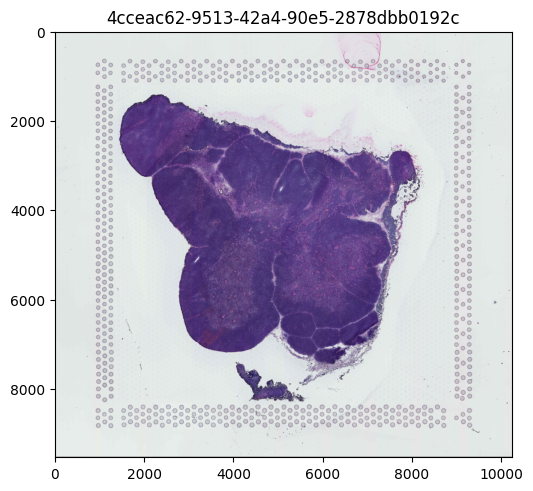

In [12]:
sdata.pl.render_images().pl.render_shapes().pl.show()

### Plotting Continuous Metadata

We can plot expression data over our tissue image from our exported SpatialData object. In the next code cell, we specifiy the radius of the overlayed spatial expression embedding, however this step is completely optional.

In [14]:
#OPTIONAL
sdata["4cceac62-9513-42a4-90e5-2878dbb0192c_loc"].radius = 40

We can specify various spatial embedding metadata to overlay on the tissue image. Here we plot gene expression of MALAT1, a continuous metadata field.

INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.008].


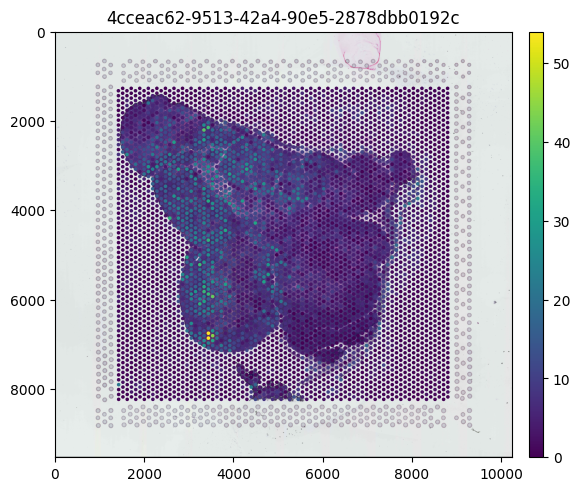

In [15]:
(
    sdata.pl.render_images()
    .pl.render_shapes(color="MALAT1")
    .pl.show()
)

### Plotting Categorical Metadata

Below, we will overlay categorical information (`cell_type`) on our tissue image. When exporting data from the Census, categorical metadata stored in the `obs` DataFrame is represented as a **pandas categorical series**. 

Since this DataFrame is a **subset** of the original metadata, its categories still include **all possible values** from the full Census dataset—even if they are not present in our exported slice of data. This can cause issues when plotting, such as **difficulty in automatically assigning a suitable color palette**.

To resolve this, we will remove **unused categories** from the `cell_type` column before visualization.

In [24]:
# Print number of categories before resetting
print("Before:", len(sdata["RNA"].obs["cell_type"].cat.categories))

# Remove unused categories
sdata["RNA"].obs["cell_type"] = sdata["RNA"].obs["cell_type"].cat.remove_unused_categories()

# Print number of categories after resetting
print("After:", len(sdata["RNA"].obs["cell_type"].cat.categories))

Before: 228
After: 7


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.008].


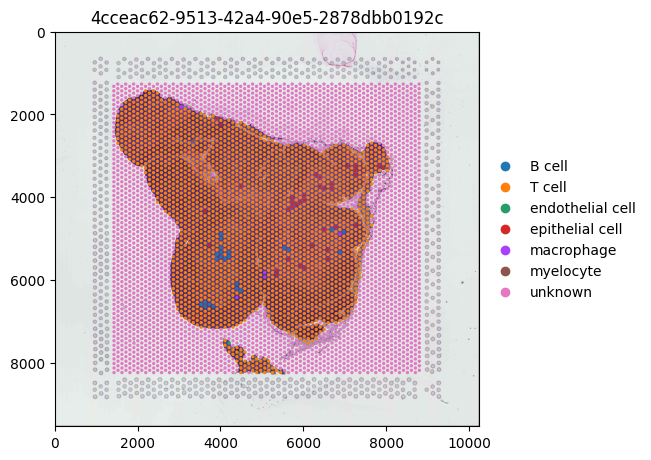

In [25]:
(
    sdata.pl.render_images()
    .pl.render_shapes(color="cell_type")
    .pl.show()
)

This should help you get started with accessing, exporting, and visualizing spatial assays retrieved from the CZ CELLxGENE Census. For any feature requests, questions, issues, or help troubleshooting, please reach out to [cellxgene@chanzuckerberg.com](cellxgene@chanzuckerberg.com)